### **Bike Sharing Assignment**

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. 
Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment 
information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. 
The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business 
plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation 
ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation 
gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. 
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

    * Which variables are significant in predicting the demand for shared bikes.
    * How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands 
across the American market based on some factors. 

### **Steps Performed**
 * Step 1: Reading and Understanding the data 
 * Step 2: Visualizing the data
 * Step 3: Data Prepration
 * Step 4: Splitting the Data into Training and Testing Sets
 * Step 5: Rescaling the Features
 * Step 6: Building a linear model
 * Step 7: Residual Analysis
 * Step 8: Predictions and Evaluation on the Test Set
 * Step 9: Model Evaluation

In [2]:
# Import all required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### **Step1: Reading and Understanding the data** 

In [62]:
# Read the daata 
bikedf = pd.read_csv("./data/day.csv")
bikedf

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [63]:
bikedf.shape

(730, 16)

#### Checking for NULL/MISSING values 

In [60]:
round(bikedf.isnull().sum() / len(bikedf) * 100,2).sort_values(ascending=False)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Removing/drop the Columns
 * Instant: Its only an index value, we have a default index for the same purpose.
 * dteday: This has the date, since we already have seperate columns for year & month, hence we can carry out our analysis without this columns
 * casual & registered: both these columns contains the count of bike booked by different categories of customers. SInce our objective is to 
   find the total count of bikes and not by specific category, we will ignore these two columns

In [64]:
bikedf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [65]:
# instant is index variable which is not required for prediction 
bikedf = bikedf.drop(['instant','dteday','casual','registered'], axis = 1)

In [67]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [18]:
#bikedf.yr.value_counts() # 0,1
#bikedf.season.value_counts() # 1,2,3,4
#bikedf.holiday.value_counts() # 0,1

holiday
0    709
1     21
Name: count, dtype: int64

In [68]:
bikedf.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### **Step 2: Visualizing the data**

Let's now spend some time doing what is arguably the most important step - understanding the data.

 * If there is some obvious multicollinearity going on, this is the first place to catch it
 * Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

In [73]:
bikedf.value_counts()

season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp      hum      windspeed  cnt 
4       1   12    0        6        0           2           15.648347  19.475400  91.1250  6.792393   5582    1
1       0   1     0        0        0           1           3.957390   4.941955   43.6522  16.522200  986     1
                                                            5.671653   5.808750   43.4167  24.250650  822     1
                                                            8.877402   12.516100  72.2174  4.956834   1096    1
                                                            9.498347   11.710850  48.3750  12.625011  1204    1
                                                                                                             ..
                           3        1           1           9.305237   11.463500  43.6957  12.522300  1600    1
                                                            7.081807   8.023650   59.9545  20.410009  1162   

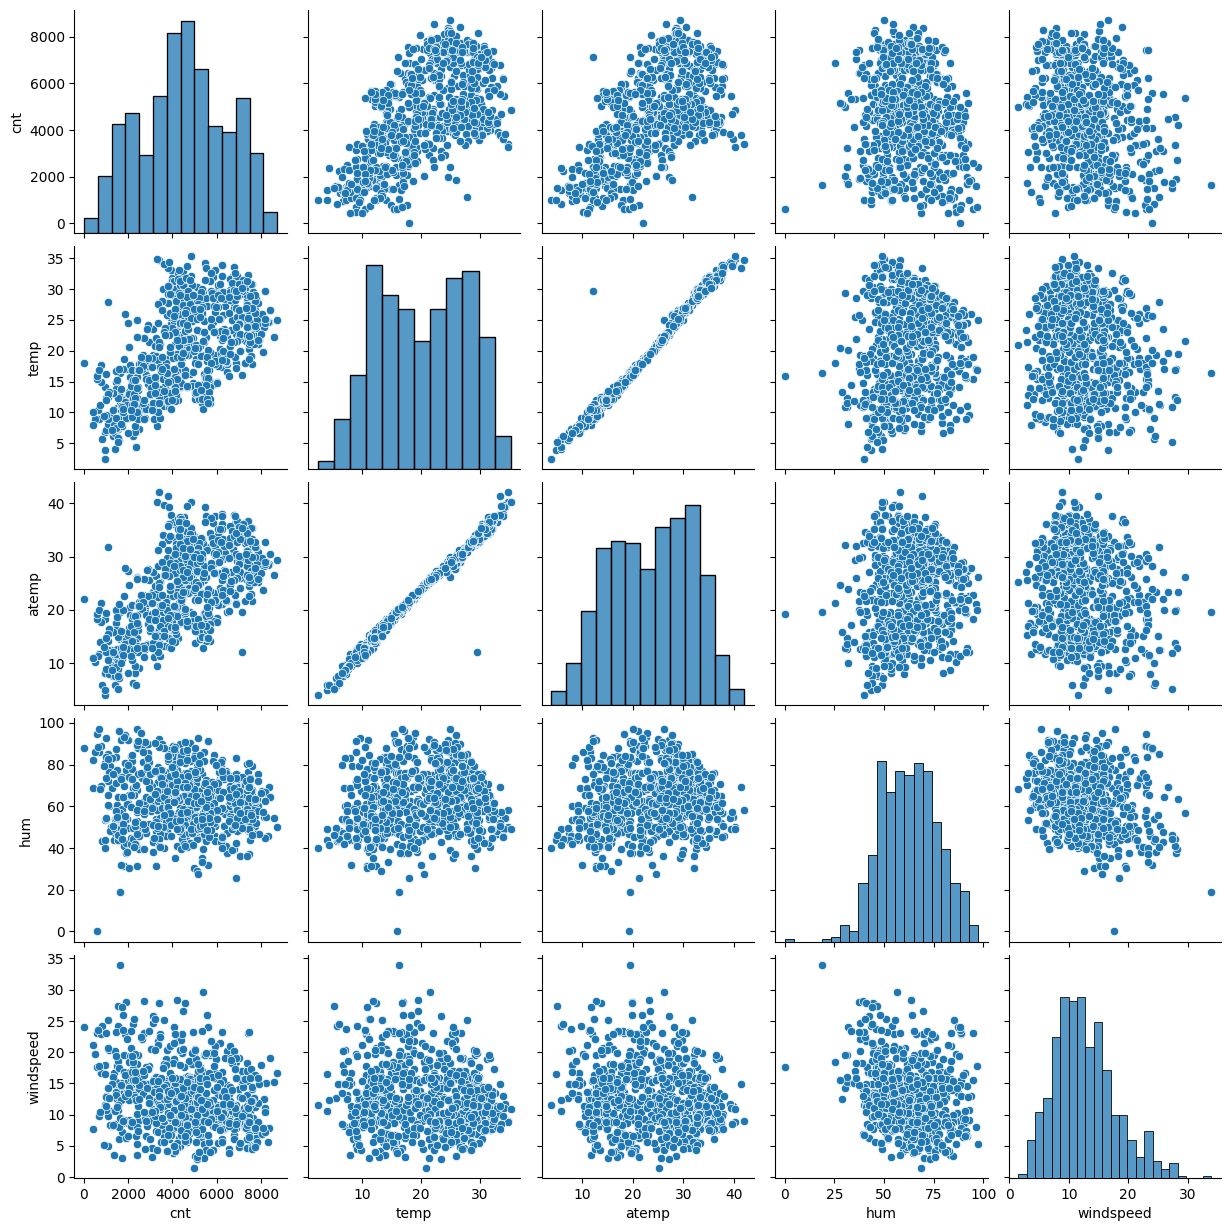

In [77]:
# Visualising the numerical variable
# Lets make a pair plot of all the numeric varibale 
num_vars = ['cnt','temp','atemp','hum','windspeed']
sns.pairplot(bikedf[num_vars])
plt.show()

### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

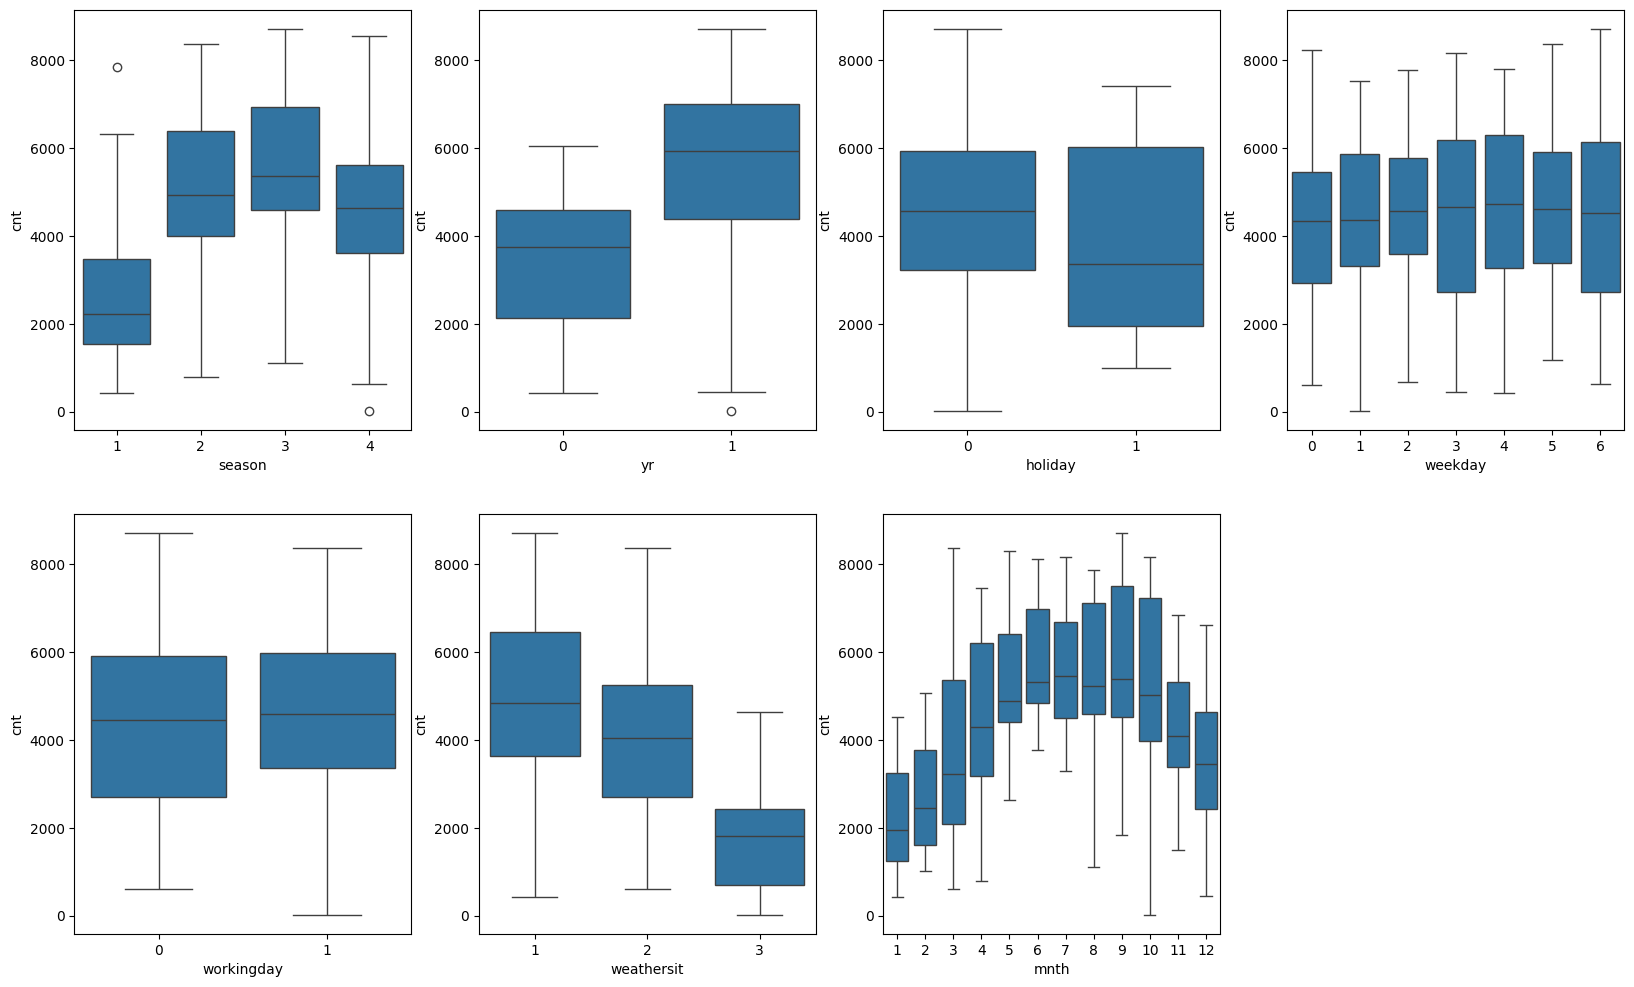

In [75]:
# Visualizing the categoriacal variable
plt.figure(figsize=(20,12))
plt.subplot(2,4,1,)
sns.boxplot(x='season', y = 'cnt', data = bikedf)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y = 'cnt', data = bikedf)
plt.subplot(2,4,3)
sns.boxplot(x='holiday', y = 'cnt', data = bikedf)
plt.subplot(2,4,4)
sns.boxplot(x='weekday', y = 'cnt', data = bikedf)
plt.subplot(2,4,5)
sns.boxplot(x='workingday', y = 'cnt', data = bikedf)
plt.subplot(2,4,6)
sns.boxplot(x='weathersit', y = 'cnt', data = bikedf)
plt.subplot(2,4,7)
sns.boxplot(x='mnth', y = 'cnt', data = bikedf)
plt.show()

### **Step 3: Data Preparation**

Mapping the Categorical values to their respective categorical string values

	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- mnth : month ( 1 to 12)
	- weekday : day of the week
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [81]:
import calendar
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [80]:
bikedf['season'] = bikedf.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bikedf['mnth'] = bikedf.mnth.apply(lambda x: calendar.month_abbr[x])
bikedf['weekday'] = bikedf.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
bikedf['weathersit'] = bikedf.weathersit.map({1:'Clear',2:"Mist&Cloudy",3:'Light Snow,Light Rain',4:'Heavy Rain & Ice Pallets'})

In [82]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Dummy Variables
The variables mnth weekday season weathersit have various levels, for ex, weathersit has 3 levels , similarly variable mnth has 12 levels.

We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.


In [85]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = bikedf[['season','mnth','weekday','weathersit']]

In [89]:
dummy = pd.get_dummies(dummy, drop_first=True).astype(int)
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow,Light Rain",weathersit_Mist&Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
# Adding the dumy variables to the original dataset
bikedf = pd.concat([dummy,bikedf], axis = 1)

In [91]:
bikedf.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [92]:
# Deleting the original columns season,weathersit,weekday,mnth
bikedf = bikedf.drop(['season','weathersit','weekday','mnth'], axis = 1)
bikedf.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,"weathersit_Light Snow,Light Rain",weathersit_Mist&Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [93]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   season_Spring                     730 non-null    int64  
 1   season_Summer                     730 non-null    int64  
 2   season_Winter                     730 non-null    int64  
 3   mnth_Aug                          730 non-null    int64  
 4   mnth_Dec                          730 non-null    int64  
 5   mnth_Feb                          730 non-null    int64  
 6   mnth_Jan                          730 non-null    int64  
 7   mnth_Jul                          730 non-null    int64  
 8   mnth_Jun                          730 non-null    int64  
 9   mnth_Mar                          730 non-null    int64  
 10  mnth_May                          730 non-null    int64  
 11  mnth_Nov                          730 non-null    int64  
 12  mnth_Oct

### **Step 4: Splitting the Data into Training and Testing Sets**

The first basic step for regression is performing a train-test split.

In [94]:
#Splitting into train & test 
# We specify this so that the train and test data set always have the same rows, respectively

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bikedf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [95]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### **Step 5: RESCALING the Features**

In [96]:
from sklearn.preprocessing import MinMaxScaler
# 1. Instantiate an object 
# 2. Fit on data 
scaler = MinMaxScaler()

In [98]:
# Apply scalar() to all the columns except the dummy variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,"weathersit_Light Snow,Light Rain",weathersit_Mist&Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [99]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,"weathersit_Light Snow,Light Rain",weathersit_Mist&Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


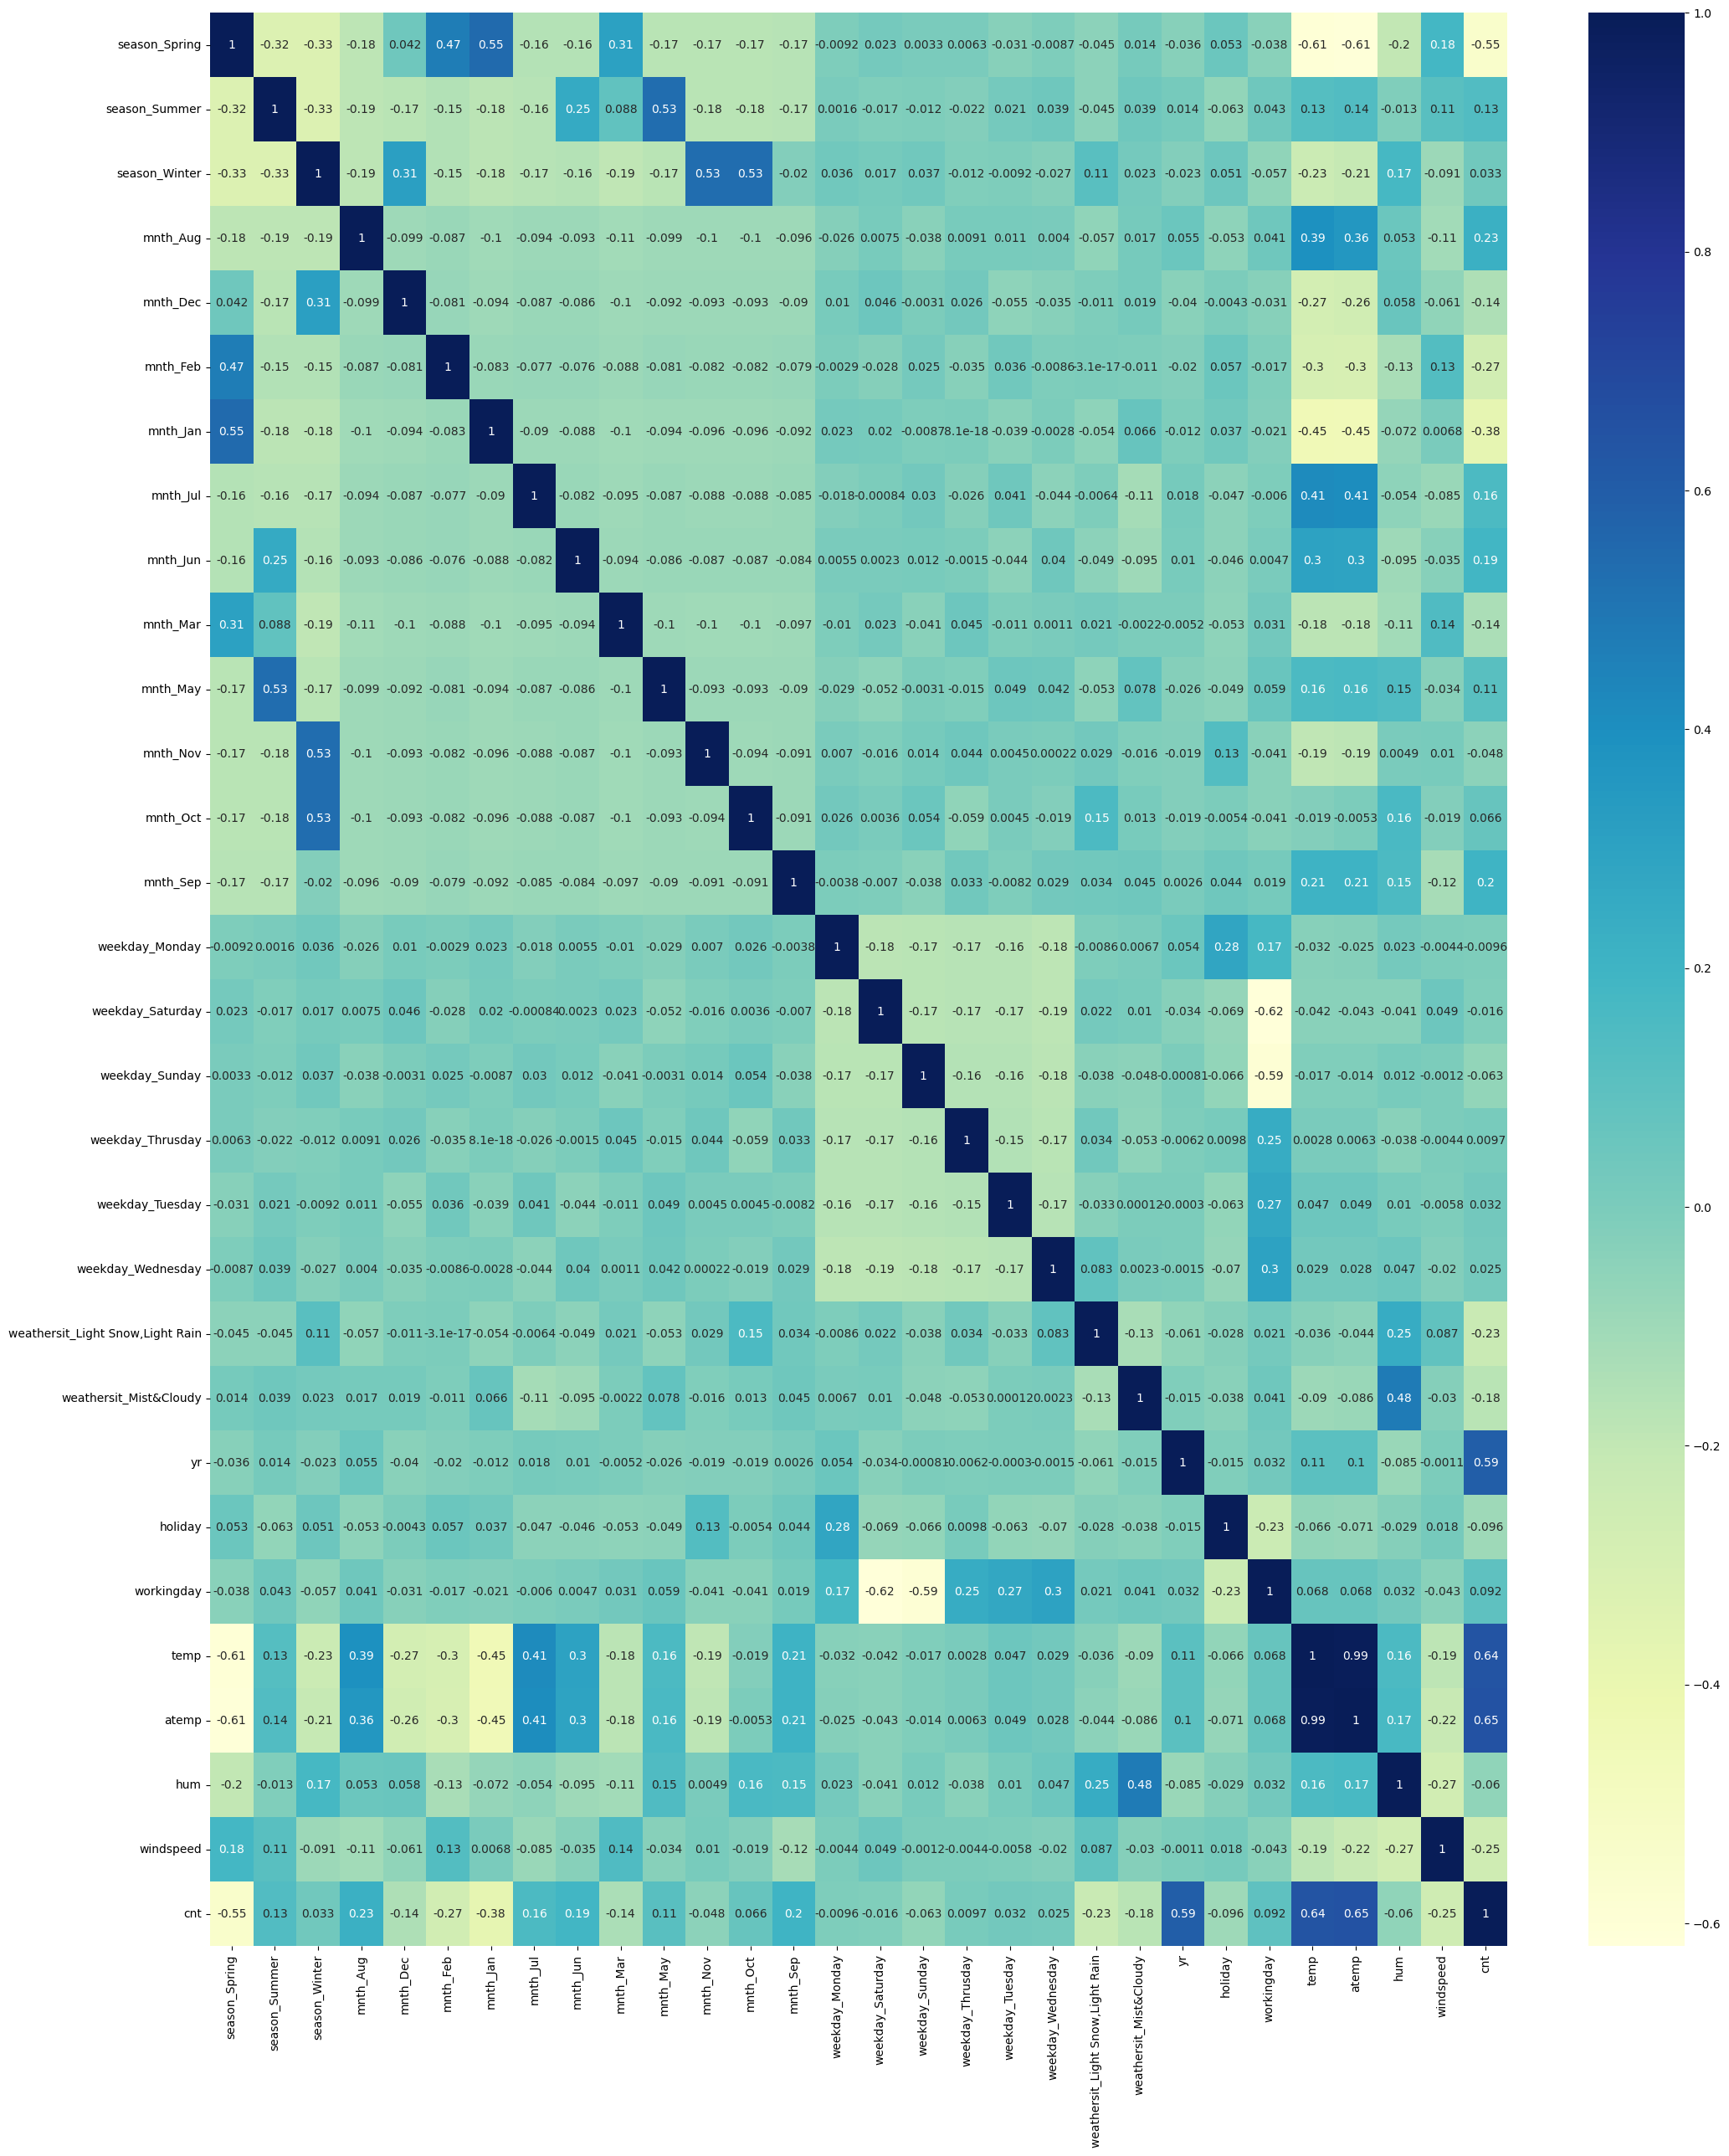

In [103]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [104]:
# X_train, y_train
y_train= df_train.pop('cnt')
X_train= df_train 

In [105]:
X_train.shape

(510, 29)

In [106]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### **Step 6: Building a linear model**

We will use a mixed approach to build the model.

Here we are using RFE approach for feature selection and then we will use the statsmodel approach for building the model

Feature Selection
We start with 15 variables.

We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [108]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [110]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [111]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', np.True_, np.int64(1)),
 ('season_Summer', np.True_, np.int64(1)),
 ('season_Winter', np.True_, np.int64(1)),
 ('mnth_Aug', np.False_, np.int64(3)),
 ('mnth_Dec', np.False_, np.int64(12)),
 ('mnth_Feb', np.False_, np.int64(11)),
 ('mnth_Jan', np.False_, np.int64(2)),
 ('mnth_Jul', np.True_, np.int64(1)),
 ('mnth_Jun', np.False_, np.int64(10)),
 ('mnth_Mar', np.False_, np.int64(7)),
 ('mnth_May', np.False_, np.int64(5)),
 ('mnth_Nov', np.False_, np.int64(14)),
 ('mnth_Oct', np.True_, np.int64(1)),
 ('mnth_Sep', np.True_, np.int64(1)),
 ('weekday_Monday', np.False_, np.int64(8)),
 ('weekday_Saturday', np.True_, np.int64(1)),
 ('weekday_Sunday', np.False_, np.int64(6)),
 ('weekday_Thrusday', np.False_, np.int64(13)),
 ('weekday_Tuesday', np.False_, np.int64(9)),
 ('weekday_Wednesday', np.False_, np.int64(15)),
 ('weathersit_Light Snow,Light Rain', np.True_, np.int64(1)),
 ('weathersit_Mist&Cloudy', np.True_, np.int64(1)),
 ('yr', np.True_, np.int64(1)),
 ('holiday', np.

In [112]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Oct', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow,Light Rain', 'weathersit_Mist&Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [113]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [114]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

### Adding a constant variable
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [115]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [116]:
X_train_rfe.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Oct,mnth_Sep,weekday_Saturday,"weathersit_Light Snow,Light Rain",weathersit_Mist&Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,1.0,0,0,1,0,1,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,1.0,0,0,0,1,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1.0,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,1.0,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475


In [118]:
# create first model 
lm1 = sm.OLS(y_train,X_train_rfe)

# Fit the model 
lr_model1 = lm1.fit()

# params
lr_model1.params

const                               0.252390
season_Spring                      -0.062202
season_Summer                       0.050947
season_Winter                       0.082628
mnth_Jul                           -0.052030
mnth_Oct                            0.038979
mnth_Sep                            0.085902
weekday_Saturday                    0.054252
weathersit_Light Snow,Light Rain   -0.252566
weathersit_Mist&Cloudy             -0.058325
yr                                  0.230237
holiday                            -0.056919
workingday                          0.044339
temp                                0.510506
hum                                -0.161453
windspeed                          -0.183001
dtype: float64

In [119]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.29e-191
Time:                        15:50:54   Log-Likelihood:                 520.48
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     494   BIC:                            -941.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2524      0.036      6.998      0.000       0.182       0.323
season_Spring                       -0.0622      0.021     -3.004      0.003      -0.103      -0.022
season_Summer                        0.0509      0.015      3.450      0.001       0.022       0.080
season_Winter                        0.0826      0.019      4.424      0.000       0.046       0.119
mnth_Jul                            -0.0520      0.018     -2.882      0.004      -0.087      -0.017
mnth_Oct                             0.0390      0.017      2.258      0.024       0.005       0.073
mnth_Sep                             0.0859      0.017      5.196      0.000       0.053       0.118
weekday_Saturday                     0.0543      0.014      3.747      0.000       0.026       0.083
weathersit_Light Snow,Light Rain    -0.2526      0.026     -9.674      0.000      -0.304      -0.201
weathersit_Mist&Cloudy              -0.0583      0.010     -5.627      0.000      -0.079      -0.038
yr                                   0.2302      0.008     28.830      0.000       0.215       0.246
holiday                             -0.0569      0.027     -2.119      0.035      -0.110      -0.004
workingday                           0.0443      0.012      3.853      0.000       0.022       0.067
temp                                 0.5105      0.034     15.040      0.000       0.444       0.577
hum                                 -0.1615      0.037     -4.338      0.000      -0.235      -0.088
windspeed                           -0.1830      0.025     -7.228      0.000      -0.233      -0.133
==============================================================================
Omnibus:                       76.176   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.360
Skew:                          -0.742   Prob(JB):                     1.14e-44
Kurtosis:                       5.706   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model.**

### Checking VIF for multicollinearity
 Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [120]:
# Check for the VIF values of the feature variables. 
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.50
1,season_Spring,5.13
3,season_Winter,4.24
13,temp,3.81
2,season_Summer,2.62
14,hum,1.91
12,workingday,1.88
7,weekday_Saturday,1.78
9,weathersit_Mist&Cloudy,1.57
5,mnth_Oct,1.53


### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [121]:
# dropping `const` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,28.65
12,temp,17.46
11,workingday,5.33
14,windspeed,4.72
0,season_Spring,4.25
2,season_Winter,4.09
1,season_Summer,2.84
8,weathersit_Mist&Cloudy,2.29
9,yr,2.08
6,weekday_Saturday,1.98


In [123]:
# dropping `hum` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [124]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.18
11,workingday,5.26
13,windspeed,4.65
2,season_Winter,2.50
0,season_Spring,2.49
1,season_Summer,2.33
9,yr,2.07
6,weekday_Saturday,1.97
4,mnth_Oct,1.62
3,mnth_Jul,1.60


In [125]:
# dropping `hum` column as the vif is > 5
X_train_rfe = X_train_rfe.drop(['temp'], axis=1)

In [126]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,4.23
11,workingday,3.82
2,season_Winter,2.47
0,season_Spring,2.31
1,season_Summer,2.27
9,yr,1.91
6,weekday_Saturday,1.69
4,mnth_Oct,1.57
8,weathersit_Mist&Cloudy,1.56
3,mnth_Jul,1.30


### Note: 
The VIF value of temp is nearly equal to 5. Hence, we are not dropping this feature.

### Preparing the FInal Model

In [127]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm2 = sm.OLS(y_train,X_train_lm).fit()

In [128]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     135.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.83e-153
Time:                        16:03:08   Log-Likelihood:                 424.16
No. Observations:                 510   AIC:                            -820.3
Df Residuals:                     496   BIC:                            -761.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.5375      0.020     26.668      0.000       0.498       0.577
season_Spring                       -0.2951      0.016    -18.042      0.000      -0.327      -0.263
season_Summer                       -0.0413      0.016     -2.548      0.011      -0.073      -0.009
season_Winter                       -0.1050      0.017     -6.265      0.000      -0.138      -0.072
mnth_Jul                            -0.0067      0.021     -0.313      0.754      -0.049       0.035
mnth_Oct                             0.0966      0.020      4.782      0.000       0.057       0.136
mnth_Sep                             0.0821      0.020      4.133      0.000       0.043       0.121
weekday_Saturday                     0.0580      0.017      3.332      0.001       0.024       0.092
weathersit_Light Snow,Light Rain    -0.3180      0.029    -11.003      0.000      -0.375      -0.261
weathersit_Mist&Cloudy              -0.0941      0.010     -9.251      0.000      -0.114      -0.074
yr                                   0.2474      0.010     26.036      0.000       0.229       0.266
holiday                             -0.0533      0.032     -1.648      0.100      -0.117       0.010
workingday                           0.0503      0.014      3.631      0.000       0.023       0.077
windspeed                           -0.1743      0.029     -5.983      0.000      -0.232      -0.117
==============================================================================
Omnibus:                       47.953   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.346
Skew:                          -0.477   Prob(JB):                     4.47e-27
Kurtosis:                       5.191   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,windspeed,4.23
11,workingday,3.82
2,season_Winter,2.47
0,season_Spring,2.31
1,season_Summer,2.27
9,yr,1.91
6,weekday_Saturday,1.69
4,mnth_Oct,1.57
8,weathersit_Mist&Cloudy,1.56
3,mnth_Jul,1.30


### **Step 7: RESIDUAL Analysis of the train data**

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [130]:
y_train_cnt = lm2.predict(X_train_lm)

In [132]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

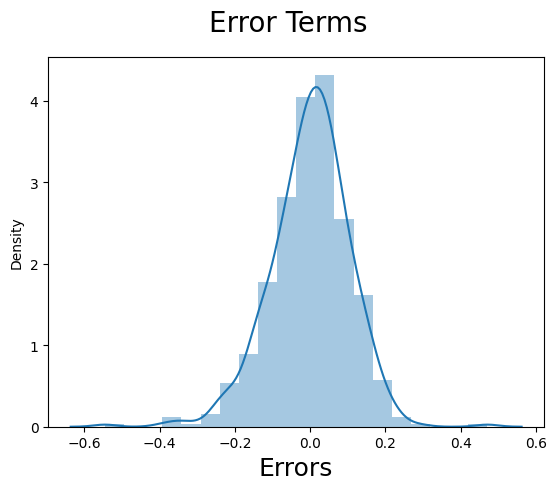

In [133]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### **Step 8: Predictions and Evaluation on the Test Set**


Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

Applying the scaling on the test sets

In [134]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [135]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,"weathersit_Light Snow,Light Rain",weathersit_Mist&Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [136]:
y_test = df_test.pop('cnt')
X_test = df_test

In [137]:
# add a constant 
X_test_sm =  sm.add_constant(X_test)
X_test_sm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Wednesday,"weathersit_Light Snow,Light Rain",weathersit_Mist&Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
184,1.0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219
535,1.0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728
299,1.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206
221,1.0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570
152,1.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414


In [138]:
# Predicting using values used by the final model
test_col = X_train_lm.columns
X_test_sm=X_test_sm[test_col[1:]]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_sm)

X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   const                             219 non-null    float64
 1   season_Spring                     219 non-null    int64  
 2   season_Summer                     219 non-null    int64  
 3   season_Winter                     219 non-null    int64  
 4   mnth_Jul                          219 non-null    int64  
 5   mnth_Oct                          219 non-null    int64  
 6   mnth_Sep                          219 non-null    int64  
 7   weekday_Saturday                  219 non-null    int64  
 8   weathersit_Light Snow,Light Rain  219 non-null    int64  
 9   weathersit_Mist&Cloudy            219 non-null    int64  
 10  yr                                219 non-null    int64  
 11  holiday                           219 non-null    int64  
 12  workingday  

In [140]:
# Making predictions using the final model

y_test_pred = lm2.predict(X_test_sm)

In [141]:
# evalute the model => compute the R^2
from sklearn.metrics import r2_score

In [142]:
r2_score(y_true=y_test, y_pred=y_test_pred) # 77%

0.7701069578492513

### **Conclusion**:
We can see that the r_squared on the test set is 0.77 and the r-squared on the trained set 0.78 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

### Step 9: **Model Evaluation**

Text(0, 0.5, 'y_test_pred')

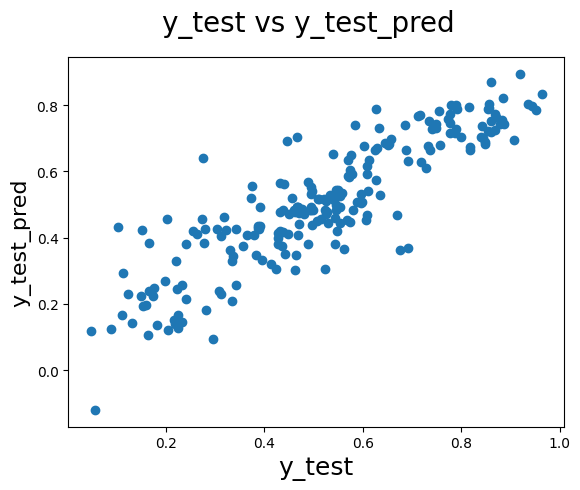

In [143]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Conclusion:
We can colude that the final model fit isn't by chance, and has descent predictive power.

### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [145]:
param = pd.DataFrame(lm2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
0,const,0.537517
10,yr,0.247366
5,mnth_Oct,0.096599
6,mnth_Sep,0.082054
7,weekday_Saturday,0.057978
12,workingday,0.050274
4,mnth_Jul,-0.006718
2,season_Summer,-0.041254
11,holiday,-0.053341


### **Final Conclusions**
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

#### All the positive coefficients like season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

 * From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well 
  explain more than 77% of bike demand.

 * Coeffiencients of the variables explains the factors effecting the bike demand

  * Based on final model few features contributing significantly towards explaining the demand are:

  * weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.318043)

  * year (0.247366)

Hence, it can be clearly concluded that the variables year , season/ weather situation and month are significant in predicting the demand for shared bikes .

### **Final Recommendations for the Company**
* The months -  Jul , Sep , Oct should be considered by the company as they have a higher demand as compared to other months.
* During the Winter season the demand rises, hence it should be well prepared to meet the high demand.